<a href="https://colab.research.google.com/github/Skyreacher-hub/Sales-Data-Analysis/blob/main/Copy_of_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset**

In today’s competitive market, data-driven decision-making is crucial for businesses to optimize their sales strategies. Sales data contains valuable insights that can help organizations understand customer behavior, identify seasonal trends, and improve overall performance. By analyzing a real-world sales dataset, businesses can make informed decisions to boost revenue and enhance customer satisfaction.

O**bjective:**
This analysis will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the csv file of the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset.csv")

In [ ]:
#Check the first 15 rows of the dataset
df.head(15)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
5,6,2024-07-07,C017,Laptop,2,1000,1882.00
6,7,2024-01-21,C017,NaN,1,1000,975.85
7,8,2024-04-12,C002,Monitor,2,200,434.12
8,9,2024-05-01,C002,Phone,1,600,626.59
9,10,2024-08-02,C005,Phone,1,600,545.77


In [ ]:
#Check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


*italicized text*

***From the information displayed, we see that the columns; Product and Total, have missing data. Since the Calculated percentage of missing data is less than 20% for each column, we can exclude the missing data from the dataset without skewing.***

In [ ]:
#Drop empty cells
df = df.dropna()

In [ ]:
# prompt: check the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     185 non-null    int64  
 1   Date        185 non-null    object 
 2   CustomerID  185 non-null    object 
 3   Product     185 non-null    object 
 4   Quantity    185 non-null    int64  
 5   Price       185 non-null    int64  
 6   Total       185 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.6+ KB


***Convert the date column to datetime data type and extract the month from date. We want to show the trend of sales over a couple of months.***

In [ ]:
# create another column that extracts the month from the date column. The month column should be in word
df['month'] = df['Date'].apply(lambda x: pd.to_datetime(x).strftime('%B'))
df.head()


,OrderID,Date,CustomerID,Product,Quantity,Price,Total,month
0,1,2024-04-12,C002,Phone,1,600,642.09,April
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,December
2,3,2024-09-27,C017,Monitor,1,200,196.34,September
3,4,2024-04-16,C005,Phone,3,600,1955.86,April
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,March


In [ ]:
# re-arrange the columns such as month column will be by the side of date column

# Get the list of columns
cols = df.columns.tolist()

# Find the index of 'Date' and 'month'
date_index = cols.index('Date')
month_index = cols.index('month')

# Remove 'month' from its current position
cols.pop(month_index)

# Insert 'month' after 'Date'
cols.insert(date_index + 1, 'month')

# Reindex the DataFrame with the new column order
df = df[cols]

df.head()

,OrderID,Date,month,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,April,C002,Phone,1,600,642.09
1,2,2024-12-14,December,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,September,C017,Monitor,1,200,196.34
3,4,2024-04-16,April,C005,Phone,3,600,1955.86
4,5,2024-03-12,March,C017,Laptop,1,1000,1098.19


***We want to create another column to calculate the profit made for each product sold.***

In [ ]:
# Create a column titled Profit and it is calculated by multiplying price by quantity and subtracting the answer from total

df['Profit'] = df['Total'] - (df['Price'] * df['Quantity'])
df.tail()

,OrderID,Date,month,CustomerID,Product,Quantity,Price,Total,Profit
195,196,2024-04-22,April,C019,Monitor,1,200,181.37,-18.63
196,197,2024-11-13,November,C017,Laptop,1,1000,1066.13,66.13
197,198,2024-02-21,February,C019,Tablet,1,400,387.62,-12.38
198,199,2024-09-24,September,C005,Phone,2,600,1265.72,65.72
199,200,2024-10-21,October,C009,Laptop,1,1000,972.55,-27.45


***We are first interested in knowing which month had the highest sales***

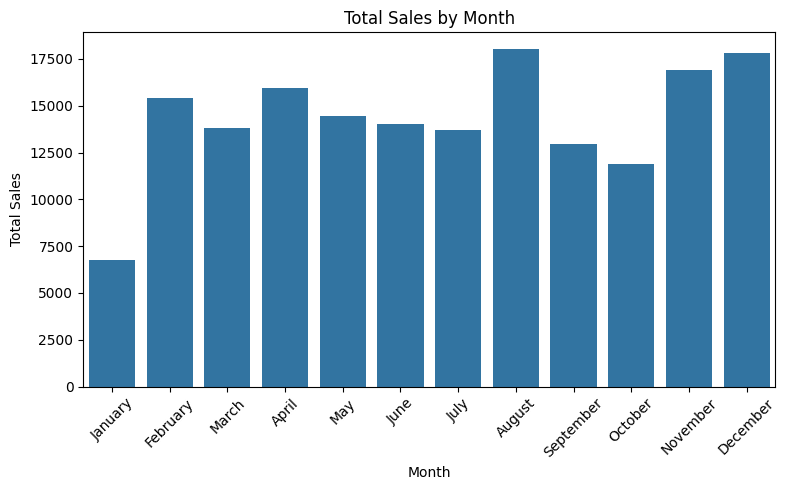

In [ ]:
# create a visualization of the sales data to show the months and their total sales. Arrange the months from January to December


# Aggregate sales data by month
monthly_sales = df.groupby('month')['Total'].sum().reset_index()

# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the monthly sales DataFrame according to the correct month order
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('month')

# Create the visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='Total', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***From the bar chart above, we see that the month with the highest sales is July. But does that volume of sale translate into highest profit? The next chart is a chart of month vs profit***

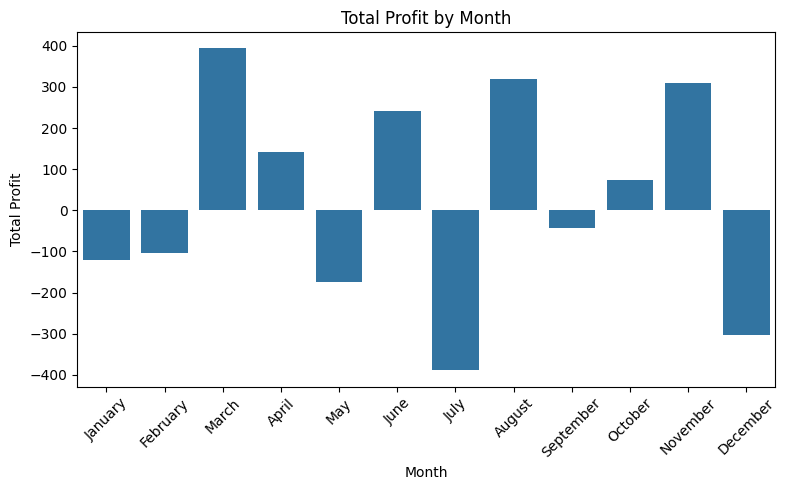

In [ ]:
#create a visualization of the sales data to show the months and the sum of their profit. Arrange the months from January to December

# Aggregate sales data by month
monthly_sales = df.groupby('month')['Profit'].sum().reset_index()

# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the monthly sales DataFrame according to the correct month order
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('month')

# Create the visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='Profit', data=monthly_sales)
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***From the bar chart above showing months vs profit, we can see that in the month of March, we had the highest profit and in the month of July, we had the most loss. What could have been responsible for this? Maybe discount sales, promotion sales, etc.***

***We are interested in knowing the most viable product by sales and by profit.***

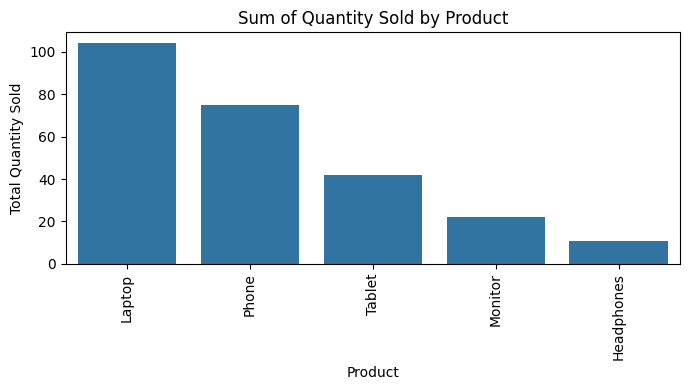

In [ ]:
# create a visualization of product vs sum of quantity sold

# Group by Product and sum the Quantity
product_quantity = df.groupby('Product')['Quantity'].sum().reset_index()

# Sort by Quantity in descending order to highlight top products
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

# Create the visualization
plt.figure(figsize=(7, 4))
sns.barplot(x='Product', y='Quantity', data=product_quantity)
plt.title('Sum of Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

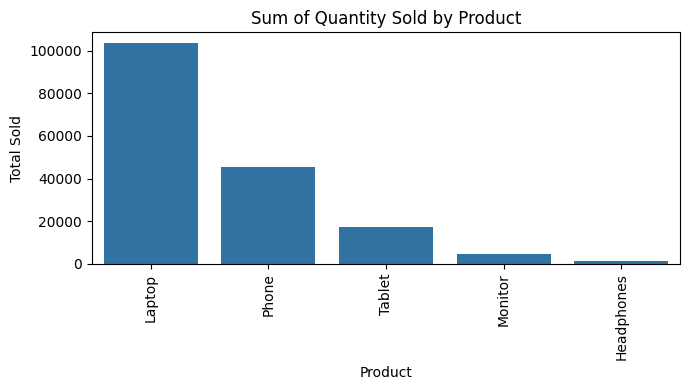

In [ ]:
# create a visualization of product vs sum of sales made

# Group by Product and sum sales
product_quantity = df.groupby('Product')['Total'].sum().reset_index()

# Sort by Quantity in descending order to highlight top products
product_quantity = product_quantity.sort_values(by='Total', ascending=False)

# Create the visualization
plt.figure(figsize=(7, 4))
sns.barplot(x='Product', y='Total', data=product_quantity)
plt.title('Sum of Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

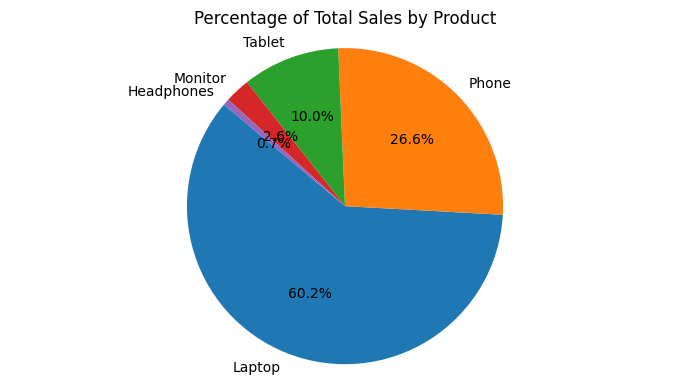

In [ ]:
# Make the above visualization a pie chart

# Group by Product and sum sales
product_sales = df.groupby('Product')['Total'].sum().reset_index()

# Sort by Total in descending order
product_sales = product_sales.sort_values(by='Total', ascending=False)

# Create the pie chart
plt.figure(figsize=(7, 4))
plt.pie(product_sales['Total'], labels=product_sales['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Sales by Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


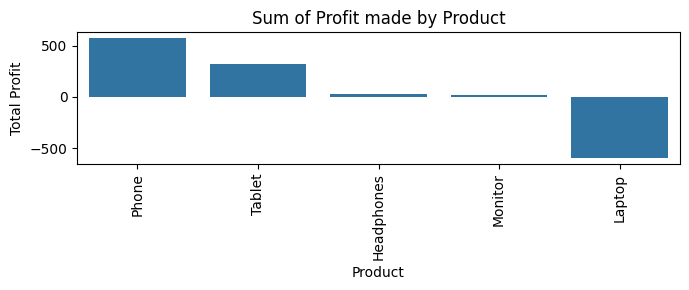

In [ ]:
# create a visualization of product vs sum of profit made

# Group by Product and Sum of Profit
product_quantity = df.groupby('Product')['Profit'].sum().reset_index()

# Sort by Quantity in descending order to highlight top products
product_quantity = product_quantity.sort_values(by='Profit', ascending=False)

# Create the visualization
plt.figure(figsize=(7, 3))
sns.barplot(x='Product', y='Profit', data=product_quantity)
plt.title('Sum of Profit made by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the pie chart showing percentage of total sales by products, we see that the laptop had the highest sales turnover of 60.2% of total sales, followed by phones with a 26.6% of total sales. But supprisingly, of all the products, the phones were the most profitable and the laptops were the least profitable. Our insight from this data analysis and visualization shows that for this gadget company, the smaller gadgets seems to bring in more profits. While there are large scale sales of laptops, focus should be put on advertising the phone sections to increase profitability

**In general overview, more context needs to be provided to understand why the month of July with the most sales had the most loss, and why laptops with the most sales of the 5 product categories had the most loss.**